# Clustering using K-MEANS, DBSCAN, K-Prototype

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.polynomial.polynomial import polyfit
import matplotlib.style as style 
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

# define random jitter
def rjitt(arr):
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

# to set data path
dataPath = 'https://raw.githubusercontent.com/stillxyxon/py_ml_analysis/master/'

In [2]:
dfc50 = pd.read_csv(dataPath + 'dfc20bs.csv')

list_feat = ['custid','age','amt_nike', 'amt_hnm','amt_strbk','amt_dgt','amt_book','amt_htl', 'amt_nxtyr', 'cnt_nxtyr']
dfc51 = dfc50[dfc50.sex=='F'][list_feat]
print(dfc51.shape)
dfc51.head()

(5000, 10)


,custid,age,amt_nike,amt_hnm,amt_strbk,amt_dgt,amt_book,amt_htl,amt_nxtyr,cnt_nxtyr
0,1,27,25100,0,20000,0,0,0,185921,3
1,2,28,21500,0,21700,0,0,0,271796,8
2,3,27,0,0,20200,0,0,0,369348,3
3,4,27,0,0,0,0,0,0,387005,8
4,5,27,20100,0,34000,0,0,0,204884,10


In [3]:
clst_cols = ['amt_nike', 'amt_hnm', 'amt_strbk', 'amt_dgt','amt_book', 'amt_htl']
clst_cols = ['amt_nike', 'amt_strbk', 'amt_book']
dfcc01 = dfc51[clst_cols]
dfcc01.head()

,amt_nike,amt_strbk,amt_book
0,25100,20000,0
1,21500,21700,0
2,0,20200,0
3,0,0,0
4,20100,34000,0


### K-Means Clustering

unique_labels {0, 1, 2, 3}


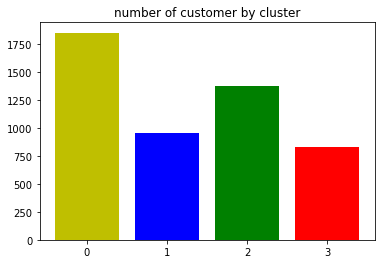

cluster profile - median value


,clst,amt_nike,amt_strbk,amt_book
0,0,24000,26200,0
1,1,24000,32900,39000
2,2,0,25300,0
3,3,23000,0,0


In [4]:
from sklearn.cluster import KMeans  

# df 자체를 할당하는 대신 복제를 생성
df4kmm = dfcc01.copy()[clst_cols]

# 타입변경은 사실 unnecessary 이미 수치형이라
X = np.array(df4kmm.astype(int))

# create k-means model
kmm1 = KMeans(n_clusters=4, random_state=111)  
# set seed using random_state option
kmm1.fit(X)  

# 군집별 고객수 분포 확인
clst_label, clst_cust_counts = np.unique(kmm1.labels_, return_counts=True)

# 고객집단을 표시할 색상을 임의로 지정
# 번호순의 색상 이름 벡터 생성
unique_labels = set(clst_label) 
print('unique_labels', unique_labels)
colors = ['y', 'b', 'g', 'r', 'grey', 'pink'] 
colors = colors[:len(unique_labels)+1].copy()
colors3 = colors

plt.bar(clst_label.astype(str), clst_cust_counts, color=colors3) 
plt.title('number of customer by cluster')
plt.show()

X1 = dfcc01.copy()[clst_cols]
X1['clst'] = kmm1.labels_
print('cluster profile - median value')
X1.groupby('clst').median().reset_index() 

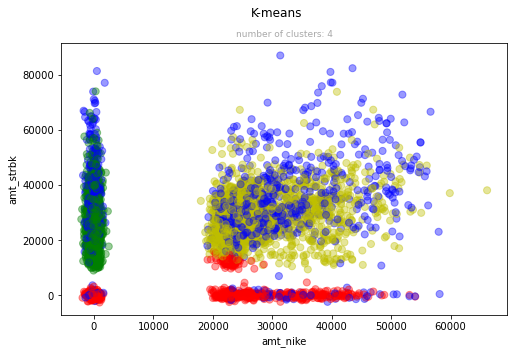

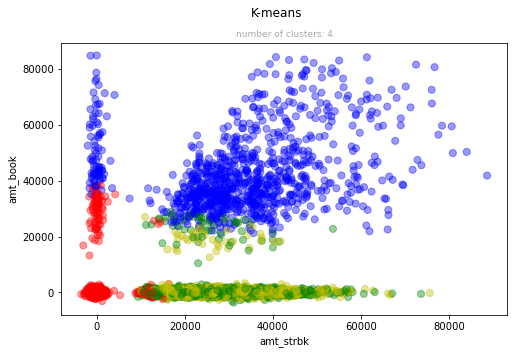

In [5]:

# 각 고객의 소속 집단이 어디인가에 따라 색상 표시
colors4 = [colors3[x] for x in  kmm1.labels_] 

for j in [0,1]:
    plt.figure(figsize=(8,5))
    plt.scatter(rjitt(df4kmm[clst_cols[j]]), rjitt(df4kmm[clst_cols[j+1]]),
       color = colors4, s=50, alpha=0.4)

    # subtitle 다는 기능이 직접적으로는 없음. 따라서 우회적 방법 활용
    plt.suptitle("K-means")
    n_clusters_ = 4
    plt.title('number of clusters: %d' %n_clusters_, fontsize=9, color='darkgrey')
    # subtitle 용도로 title을 활용하면서 폰트를 작게

    plt.xlabel(clst_cols[j])
    plt.ylabel(clst_cols[j+1])

    plt.show()
    
   

### DBSCAN Clustering
- 밀도 기반의 클러스터링은 점이 세밀하게 몰려 있어서 밀도가 높은 부분을 클러스터링
- 즉, 어느 점을 기준으로 반경 x내에 점이 n개 이상 있으면 하나의 군집으로 인식하는 방식

<class 'numpy.ndarray'> (5000,)
3
unique_labels {0, 1, 2, -1}
[-1  0  1  2]
[  42 2307 1989  662]
['k', 'y', 'b', 'g', 'r', 'grey']


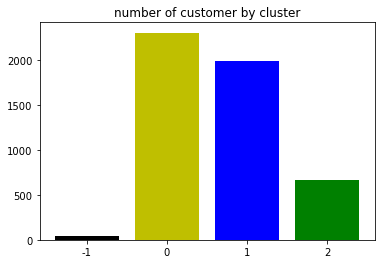

cluster profile - median value
{0, 1, 2, -1}
['y', 'b', 'g', 'r', 'grey']
[(0, 'y'), (1, 'b'), (2, 'g'), (-1, 'r')]


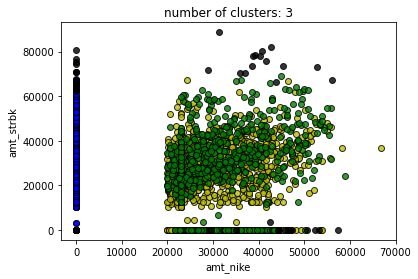

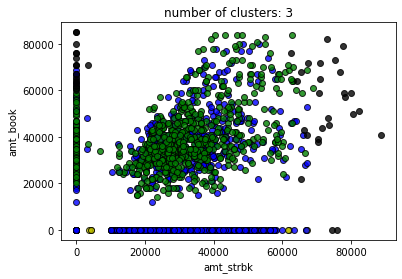

In [6]:
### Apply DBSCAN clustering

# ref :: https://www.geeksforgeeks.org/dbscan-clustering-in-ml-density-based-clustering/

from sklearn.cluster import DBSCAN 
from sklearn import metrics 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets 

# clst_cols = ['amt_nike', 'amt_strbk', 'amt_book']
X = dfcc01.copy()[clst_cols]

# Load data in X 
X = np.array(X)
db = DBSCAN(eps=12000, min_samples=20).fit(X) 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool) 
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_ 
print(type(labels), labels.shape)

# Number of clusters in labels, ignoring noise if present. 
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) 
print(n_clusters_) 


# Plot result 
  
# Black removed and is used for noise instead. 
unique_labels = set(labels) 
print('unique_labels', unique_labels)
colors = ['y', 'b', 'g', 'r', 'grey', 'pink'] 
colors = colors[:len(unique_labels)+1].copy()

# 군집별 고객수 분포 확인
clst_label, clst_cust_counts = np.unique(labels, return_counts=True)

print(clst_label)
print(clst_cust_counts)


# 고객집단을 표시할 색상을 임의로 지정
# 번호순의 색상 이름 벡터 생성
colors31 = ['k']
colors32 = colors.copy()
colors31.extend(colors32)
print(colors31)

plt.bar(clst_label.copy().astype(str), clst_cust_counts, color=colors31) 
plt.title('number of customer by cluster')
plt.show()

X1 = dfcc01.copy()[clst_cols]
X1['clst'] = labels.astype(int)
print('cluster profile - median value')
X1.groupby('clst').median().reset_index()

print(unique_labels)
print(colors)

print(list(zip(unique_labels, colors)))
# col value of -1 i.e. outlier will be replaced with 'k'

for j in [0,1]:
    for k, col in zip(unique_labels, colors): 
        if k == -1: 
            # Black used for noise. 
            col = 'k'

        class_member_mask = (labels == k) 

        xy = X[class_member_mask & core_samples_mask] 

        plt.plot(xy[:,j], xy[:,j+1], 'o', markerfacecolor=col, 
                                          markeredgecolor='k',  
                                          markersize=6, alpha=0.8) 
        
        xy = X[class_member_mask & ~core_samples_mask] 

        plt.plot(xy[:,j], xy[:,j+1], 'o', markerfacecolor=col, 
                                           markeredgecolor='k', 
                                           markersize=6, alpha=0.8) 
        plt.xlabel(clst_cols[j])
        plt.ylabel(clst_cols[j+1])

    plt.title('number of clusters: %d' %n_clusters_) 
    plt.show() 
    


### DBSCAN의 parameters
- eps : Cluster에 포함되기 위한 다른 개체들과의 허용거리 
-- (The maximum distance between two samples for one to be considered as in the neighborhood of the other. )
- min_samples (MinPts) : 한 Cluster가 가져야하는 최소 원소수 (너무 큰 값이라면 표본의 대부분이 outlier가 될 수 있고, 너무 작은 값이면 생성되는 클러스터의 수가 너무 많아질 수 있음)

### <font color=blue>K-Prototype Algorithm for Clustering Mixed attributes</font>
- combining k-means and k-modes
- k-modes clustering for categorical data. The mode of a set of data values is the value that appears most often.

In [7]:
#  https://medium.com/datadriveninvestor/k-prototype-in-clustering-mixed-attributes-e6907db91914

from kmodes.kprototypes import KPrototypes

# load data
dfc51 = dfc50[['sex','education', 'area', 'age', 'amt_strbk', 'amt_book']]
print(dfc51.head())


kproto = KPrototypes(n_clusters=4, init='Cao', verbose=0)
dfdtkprt = dfc51
X = np.array(dfdtkprt)
clusters = kproto.fit_predict(X, categorical=[0, 1, 2])
# Print cluster centroids of the trained model.
print(kproto.cluster_centroids_)
# Print training statistics
print(kproto.cost_)
print(kproto.n_iter_)


dfdtkprt['clst'] = clusters
dfdtkprt.head()



  sex   education  area  age  amt_strbk  amt_book
0   F  university  SEOL   27      20000         0
1   F  university  SEOL   28      21700         0
2   F  university  SEOL   27      20200         0
3   F     college  SEOL   27          0         0
4   F  university  SEOL   27      34000         0
[array([[2.93557457e+01, 1.62535452e+04, 3.59046455e+04],
       [2.90682504e+01, 2.97302790e+04, 2.89215686e+02],
       [2.89894626e+01, 8.58250790e+03, 2.80295047e+02],
       [2.93386076e+01, 4.28488924e+04, 4.71012658e+04]]), array([['F', 'university', 'SEOL'],
       ['F', 'university', 'SEOL'],
       ['F', 'university', 'SEOL'],
       ['F', 'university', 'SEOL']], dtype='<U10')]
689340023440.6475
7


,sex,education,area,age,amt_strbk,amt_book,clst
0,F,university,SEOL,27,20000,0,1
1,F,university,SEOL,28,21700,0,1
2,F,university,SEOL,27,20200,0,1
3,F,college,SEOL,27,0,0,2
4,F,university,SEOL,27,34000,0,1


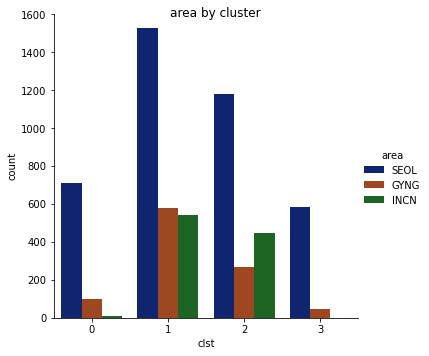

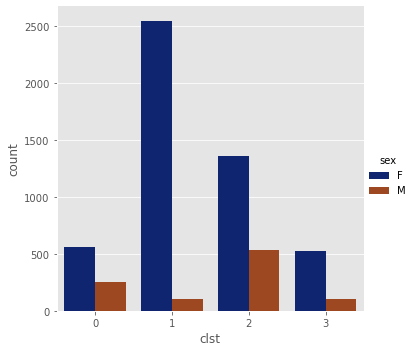

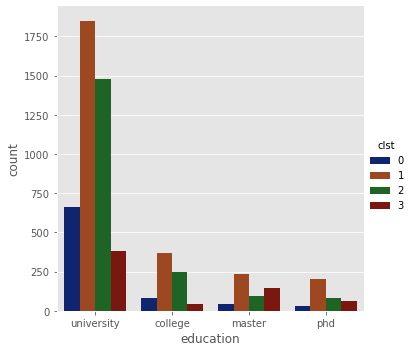

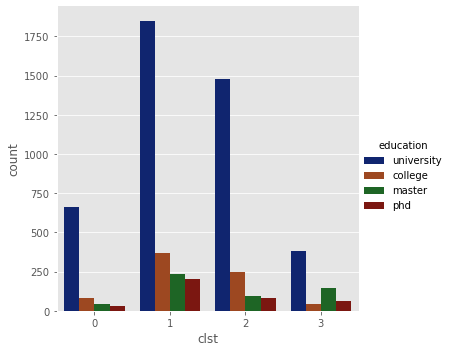

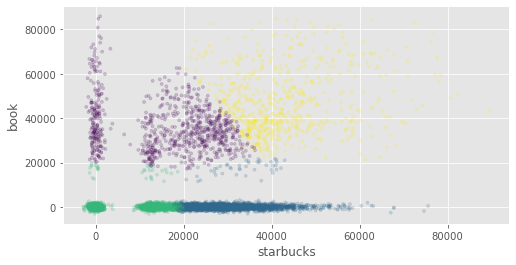

In [8]:
import seaborn as sns
ax = sns.catplot(x='clst', kind='count',hue = 'area', data=dfdtkprt,
                palette='dark')
ax.fig.suptitle('area by cluster', color='black')
plt.show()


style.use('ggplot')
#  show the relationship between a numerical and one or more categorical variables
sns.catplot(x='clst', kind='count',hue = 'sex', palette='dark', data=dfdtkprt)
plt.show()

sns.catplot(x='education', kind='count',hue = 'clst', palette='dark', data=dfdtkprt)
plt.show()

sns.catplot(x='clst', kind='count',hue = 'education', palette='dark', data=dfdtkprt)
plt.show()


plt.figure(figsize=(8,4))
plt.scatter(rjitt(dfdtkprt.amt_strbk), rjitt(dfdtkprt.amt_book),
           s=10, alpha=0.2, c=dfdtkprt.clst)
plt.xlabel('starbucks')
plt.ylabel('book')
plt.show()

- K-Prototype Algorithm 은 카테고리형 변수를 활용하지만 많이 사용하는 K-Means 등에서는 카테고리형 변수를 직접 사용할 수 없으므로 수치형식으로 encoding한 후 활용하는 방식 응용 가능 (Supervised Learning에서의 encoding 방식 참고)

### 보험료 산출 데이터에 적용

In [9]:
from kmodes.kprototypes import KPrototypes

# load data
dfi01 = pd.read_csv(dataPath + 'insurance_charge.csv')
print(dfi01.columns)

# drop target var
dfc51 = dfi01.drop('charges', axis=1)
print(dfc51.head())


kproto = KPrototypes(n_clusters=4, verbose=0)
dfdtkprt = dfc51
X = np.array(dfdtkprt)
clusters = kproto.fit_predict(X, categorical=[1, 4, 5])
# Print cluster centroids of the trained model.
# print(kproto.cluster_centroids_)

# Print training statistics
print(kproto.cost_)
print(kproto.n_iter_)


dfdtkprt['clst'] = clusters
dfdtkprt.head()


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
   age     sex     bmi  children smoker     region
0   19  female  27.900         0    yes  southwest
1   18    male  33.770         1     no  southeast
2   28    male  33.000         3     no  southeast
3   33    male  22.705         0     no  northwest
4   32    male  28.880         0     no  northwest
83512.62443307419
12


,age,sex,bmi,children,smoker,region,clst
0,19,female,27.900,0,yes,southwest,1
1,18,male,33.770,1,no,southeast,0
2,28,male,33.000,3,no,southeast,0
3,33,male,22.705,0,no,northwest,1
4,32,male,28.880,0,no,northwest,1


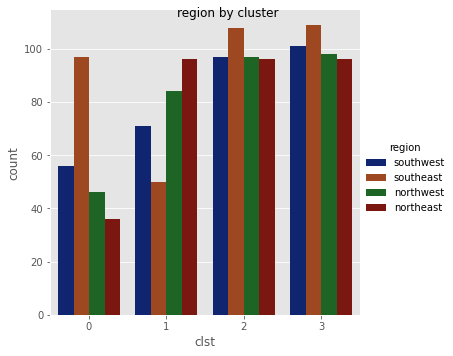

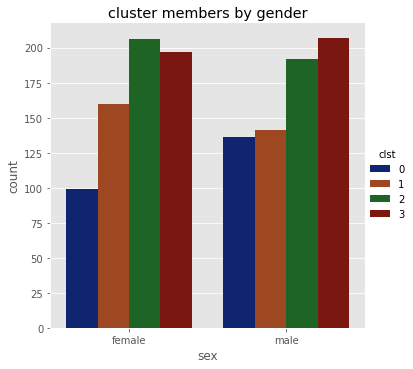

In [10]:
# Visualization of clustering

import seaborn as sns

ax = sns.catplot(x='clst', kind='count',hue = 'region', data=dfdtkprt,
                palette='dark')
ax.fig.suptitle('region by cluster', color='black')
plt.show()

sns.catplot(x='sex', kind='count',hue = 'clst', palette='dark', data=dfdtkprt)
plt.title('cluster members by gender')
plt.show()


[실습용 Quiz] 
1. age와 bmi 를 기준으로 scatter plot을 작성하고 각 고객들에 대해 색상으로 cluster를 구별하라
<br><br>
2. 클러스터별 대표값을 하나의 dataframe으로 생성하라
(수치형인 변수는 평균을 산출, category 변수는 가장 빈도가 높은 값을 산출)

[기억할 사항]
- 클러스터링은 구성을 파악하기 위한 EDA 용도로도 활용되고
- 고객세분화 또는 추천을 위한 모델의 용도로도 활용됨
- 클러스터링은 그 자체로서 정확도라는 의미가 크지 않으므로 목적에 따른 평가방식을 설정해야함